In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import json
from pathlib import Path
import os
import polars as pl
import pandas as pd

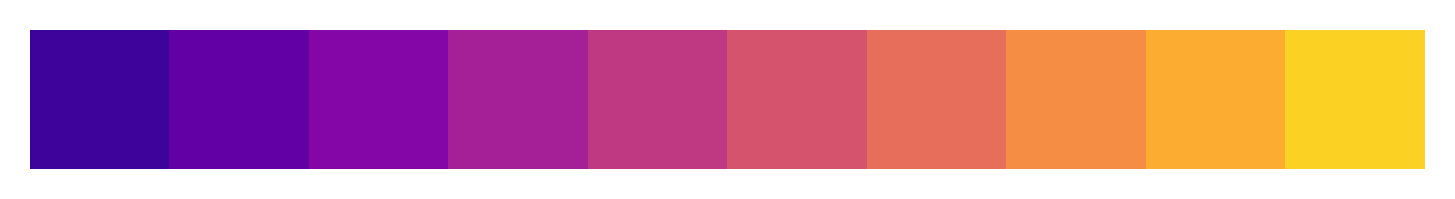

In [5]:
# plot settings
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 300

# use seaborn style
sns.set_theme(style="darkgrid")

# styling
# colormaps
cm_viridis = plt.get_cmap('viridis')
cm_plasma = plt.get_cmap('plasma')
cm_rainbow = plt.get_cmap('rainbow')
cm_gist_rainbow = plt.get_cmap('gist_rainbow')

cmap = cm_plasma # set colormap
# get colormap colors
def get_colors(amount: int, offset: int = 0):
    return [
        cmap(i)
        for i in np.linspace(0, 1, amount + offset*2)
    ][offset:-offset if offset != 0 else None]

# preview colors
fig, ax = plt.subplots(figsize=(6, 1))
colors = get_colors(10, offset=1)
ax.imshow([colors], extent=[0, len(colors), 0, 1])
ax.axis('off')
plt.show()

In [7]:
home = os.path.expanduser("~")

# Taking the paths for simpletrack results, detailed and summary
# and taking the path for detection results, detailed and summary
# function constructing a nested dictionary

def get_results(path: str):
    return {
        "path_detailed": Path(path + "/metrics_details.json"),
        "path_summary": Path(path + "/metrics_summary.json")
    }

def get_data(results):
    return {
        "data_detailed": json.load(open(results["path_detailed"])),
        "data_summary": json.load(open(results["path_summary"]))
    }

cp_0060_detections = get_data(get_results("/home/cv08f23/point-cloud-object-tracking/OpenPCDet/output/cbgs_voxel_res3d_centerpoint_custom/default/eval/epoch_30/val/default/final_result"))
cp_0060_tracking = get_data(get_results("/home/cv08f23/datasets/simpletrack/tracking/nuscenes_data/cp_0.06/debug/eval"))

# simpletrack = {
#     "path_detailed": "simpletrack-results/metrics_details.json",
#     "path_summary": "simpletrack-results/metrics_summary.json"
# }

simpletrack["data_detailed"] = json.load(open(simpletrack["path_detailed"]))
simpletrack["data_summary"] = json.load(open(simpletrack["path_summary"]))

FileNotFoundError: [Errno 2] No such file or directory: '/home/cv08f23/datasets/simpletrack/tracking/nuscenes_data/debug/eval/metrics_details.json'

In [30]:
for metric, val in data_summary['label_metrics'].items():
    if metric == 'ids' or metric == 'gt':
        fn = np.sum
    else:
        fn = np.mean

    print(f"{metric}:\t{fn(list(val.values())):.3f}")

amota:	0.642
amotp:	0.643
recall:	0.679
motar:	0.811
gt:	101897.000
mota:	0.550
motp:	0.362
mt:	603.571
ml:	216.571
faf:	46.133
tp:	11396.286
fp:	1947.714
fn:	3072.286
ids:	617.000
frag:	84.714
tid:	0.719
lgd:	1.112
